# 1. Install Dependencies and Setup

In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
# gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus: 
#     tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
# tf.config.list_physical_devices('GPU')

# 2. Remove dodgy images

In [4]:
import cv2
import imghdr

C:\Users\DELL\AppData\Local\Temp\ipykernel_12360\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [5]:
data_dir = os.path.join('data1',"train") 

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir):  #happy and sad
    for image in os.listdir(os.path.join(data_dir, image_class)):  #picks photo from each folder
        image_path = os.path.join(data_dir, image_class, image)    
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 28709 files belonging to 7 classes.


In [10]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
batch = data_iterator.next()

In [13]:
batch[1]

array([5, 4, 6, 1, 3, 0, 3, 3, 3, 3, 2, 3, 5, 0, 3, 6, 1, 0, 2, 3, 2, 3,
       4, 4, 2, 3, 2, 5, 6, 3, 1, 5])

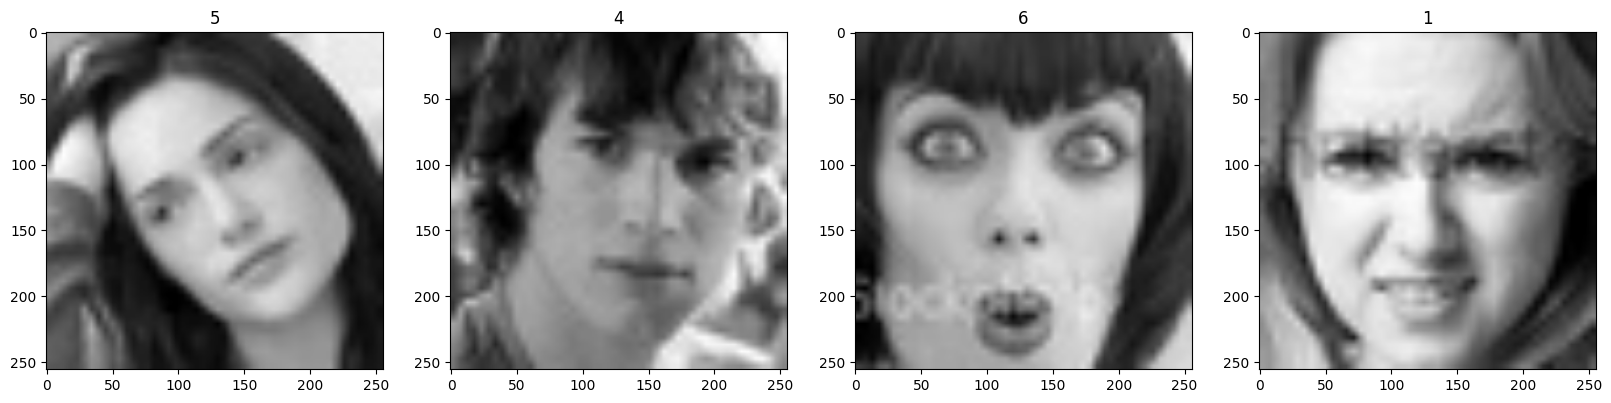

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [15]:
data = data.map(lambda x,y: (x/255, y))

In [16]:
data.as_numpy_iterator().next()

(array([[[[0.20392157, 0.20392157, 0.20392157],
          [0.20392157, 0.20392157, 0.20392157],
          [0.20392157, 0.20392157, 0.20392157],
          ...,
          [0.07058824, 0.07058824, 0.07058824],
          [0.07058824, 0.07058824, 0.07058824],
          [0.07058824, 0.07058824, 0.07058824]],
 
         [[0.20392157, 0.20392157, 0.20392157],
          [0.20392157, 0.20392157, 0.20392157],
          [0.20392157, 0.20392157, 0.20392157],
          ...,
          [0.07058824, 0.07058824, 0.07058824],
          [0.07058824, 0.07058824, 0.07058824],
          [0.07058824, 0.07058824, 0.07058824]],
 
         [[0.20392157, 0.20392157, 0.20392157],
          [0.20392157, 0.20392157, 0.20392157],
          [0.20392157, 0.20392157, 0.20392157],
          ...,
          [0.07058824, 0.07058824, 0.07058824],
          [0.07058824, 0.07058824, 0.07058824],
          [0.07058824, 0.07058824, 0.07058824]],
 
         ...,
 
         [[0.29411766, 0.29411766, 0.29411766],
          [0.29411

# 5. Split Data

In [17]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.3)
# test_size = int(len(data)*.1)

In [19]:
data_dir=os.path.join("data1","test")
for image_class in os.listdir(data_dir):  #happy and sad
    for image in os.listdir(os.path.join(data_dir, image_class)):  #picks photo from each folder
        image_path = os.path.join(data_dir, image_class, image)    
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

data_test = tf.keras.utils.image_dataset_from_directory(data_dir)
data_iterator_test = data_test.as_numpy_iterator()
test_batch = data_iterator_test.next()
data_test = data_test.map(lambda x,y: (x/255, y))

Found 7178 files belonging to 7 classes.


In [20]:
train_size

628

In [21]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
# test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [22]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [24]:
model = Sequential()

In [ ]:
# model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
# model.add(MaxPooling2D())
# model.add(Conv2D(32, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())
# model.add(Conv2D(16, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dense(3, activation='softmax'))

In [25]:
from keras.optimizers import Adam
from keras.optimizers.schedules import ExponentialDecay

initial_learning_rate = 0.0001
lr_schedule = ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)


In [26]:
model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))


model.add(Conv2D(128, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(7, activation='softmax'))

In [27]:
model.compile(optimizer = Adam(learning_rate=lr_schedule), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 126, 126, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 128)       0         
 g2D)                                                   

# 7. Train

In [29]:
logdir='logs'

In [30]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
628/628 [==============================] - 6303s 10s/step - loss: 1.7115 - accuracy: 0.3145 - val_loss: 1.5933 - val_accuracy: 0.3762
Epoch 2/10
116/628 [====>.........................] - ETA: 1:38:06 - loss: 1.5901 - accuracy: 0.3909

# 8. Plot Performance

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20) 
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in data_test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    predicted_label_index = np.argmax(yhat)

    # Map the index to the corresponding label
    class_labels = ["angry", "disgust", "fear","happy","neutral","sad", "surprise"]
    predicted_label = class_labels[predicted_label_index]

    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(pre.result(), re.result(), acc.result())

# 10. Test

In [ ]:
import cv2

In [ ]:
img = cv2.imread('sad.png')
plt.imshow(img)
plt.show()

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [ ]:
yhat

In [ ]:
model_json=model.to_json()
with open("model_json.json","w") as json_file:
    json_file.write(model_json)

In [ ]:
model.save_weights("newwwwwmodel.h5")

In [ ]:
import cv2
import numpy as np
from keras.models import model_from_json


emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# load json and create model
json_file = open('model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

# load weights into new model
emotion_model.load_weights("newwwwwmodel.h5")
print("Loaded model from disk")

# start the webcam feed
#cap = cv2.VideoCapture(0)

# pass here your video path
# you may download one from here : https://www.pexels.com/video/three-girls-laughing-5273028/
cap = cv2.VideoCapture(r"C:\Users\DELL\Pictures\Camera Roll\WIN_20230903_16_30_10_Pro.mp4")

while True:
    # Find haar cascade to draw bounding box around face
    ret, frame = cap.read()
    frame = cv2.resize(frame, (1280, 720))
    if not ret:
        break
    face_detector = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # detect faces available on camera
    num_faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)

    # take each face available on the camera and Preprocess it
    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4)
        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)

        # predict the emotions
        emotion_prediction = emotion_model.predict(cropped_img)
        maxindex = int(np.argmax(emotion_prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

    cv2.imshow('Emotion Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np
from keras.models import model_from_json

emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# load json and create model
json_file = open('model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

# load weights into new model
emotion_model.load_weights("newwwwwmodel.h5")
print("Loaded model from disk")

# start the webcam feed
# cap = cv2.VideoCapture(r"C:\Users\DELL\Pictures\Camera Roll\WIN_20230903_16_30_10_Pro.mp4")

while True:
    # Find haar cascade to draw bounding box around face
#     ret, frame = cap.read()
    frame = cv2.resize(frame, (1280, 720))
#     if not ret:
#         break
#     face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
#     gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # detect faces available on camera
    num_faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)

    # take each face available on the camera and preprocess it
    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4)
        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        
        # Preprocess the input image
        resized_img = cv2.resize(roi_gray_frame, (256, 256))
        color_img = cv2.cvtColor(resized_img, cv2.COLOR_GRAY2RGB)
        input_img = np.expand_dims(color_img, axis=0)

        # predict the emotions
        emotion_prediction = emotion_model.predict(input_img)
        predicted_label_index = np.argmax(emotion_prediction)
        print(predicted_label_index)
        # Map the index to the corresponding label
        class_labels = ["angry", "disgust", "fear","happy","neutral","sad", "surprise"]
        predicted_label = class_labels[predicted_label_index]
        print(predicted_label)
        maxindex = int(np.argmax(emotion_prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

    cv2.imshow('Emotion Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [ ]:
if yhat[0][0]>yhat[0][1] and yhat[0][0]>yhat[0][2]: 
    print(f'Person is Angry')
elif yhat[0][1]>yhat[0][0] and yhat[0][1]>yhat[0][2]:
    print(f'Person is Happy')
elif yhat[0][2]>yhat[0][0] and yhat[0][2]>yhat[0][1]:
    print("Person is Sad")
else:
    print("Person is confused")

# 11. Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','img.h5'))

In [ ]:
new_model = load_model(os.path.join('models','img.h5'))

In [ ]:
yhat=new_model.predict(np.expand_dims(resize/255, 0))

In [ ]:
yhat

In [ ]:
import gradio as gr
import cv2
import numpy as np
from keras.models import model_from_json

# Load the face detector
face_detector = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

# Load the emotion model
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}
json_file = open('model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)
emotion_model.load_weights("newwwwwmodel.h5")
print("Loaded emotion model from disk")

# Define the predict_img function
def predict_img(img):
    # Resize the image
    frame = cv2.resize(img, (1280, 720))
    num_faces = face_detector.detectMultiScale(frame, scaleFactor=1.3, minNeighbors=5)

    # Draw bounding boxes and annotate the image
    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4)
        roi_gray_frame = frame[y:y + h, x:x + w]

        # Preprocess the input image
        resized_img = cv2.resize(roi_gray_frame, (256, 256))
        color_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)
        input_img = np.expand_dims(color_img, axis=0)

        # Predict the emotions
        emotion_prediction = emotion_model.predict(input_img)
        maxindex = int(np.argmax(emotion_prediction))
        emotion_label = emotion_dict[maxindex]

        # Annotate the image with emotion label
        cv2.putText(frame, emotion_label, (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

    # Convert the annotated image to Gradio-compatible format (BGR to RGB)
    annotated_image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    return annotated_image

# Create Gradio Interface
iface = gr.Interface(fn=predict_img, inputs=gr.Image(), outputs=gr.Image(), live=True)
iface.launch()


In [ ]:
# import gradio as gr
# # import cv2
# # import tensorflow as tf
# # from tensorflow.keras.models import load_model
# # import numpy as np
# # import os

# # Load the model
# new_model = load_model(os.path.join( 'models', 'img.h5'))

# # Define the predict_img function
# def predict_img(img):
#     # Resize the image
#     resize = tf.image.resize(img, (256, 256))

#     # Make predictions
#     yhat = new_model.predict(np.expand_dims(resize / 255, 0))

#     # Return the prediction result
#     if yhat > 0.5:
#         return 'Predicted class is Sad'
#     else:
#         return 'Predicted class is Happy'

# # Function to extract frames from a video
# def video_to_frames(video_path):
#     cap = cv2.VideoCapture(video_path)
#     frames = []
#     while True:
#         ret, frame = cap.read()
#         if not ret:
#             break
#         frames.append(frame)
#     return frames

# # Function to process video
# def process_video(video):
#     predictions = []
#     for frame in video:
#         prediction = predict_img(frame)
#         predictions.append(prediction)
#     return predictions

# # Create Gradio Interface
# iface = gr.Interface(
#     fn=process_video,
#     inputs="video",
#     outputs="text",
#     live=True,
# #     interpretation="default",
# )

# iface.launch()


In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv(os.path.join(data_dir,"dd","fer2013.csv"))

In [ ]:
data

In [ ]:
train=np.array([])
test=np.array([])
j=0
for i in data["Usage"]:
    if i== "Training":
        train=np.append(j,data["pixels"])
        j=j+1
    else:
        test=np.append(j,data["pixels"])
        j=j+1